# **MAIN CODE BASE**

In [2]:
from collections import Counter
import pandas as pd
import math

In [2]:
data = pd.read_csv("/content/drive/MyDrive/IR-assignment-2-data (2).txt", sep=" ", header=None)
data.drop(columns=[138], axis=1, inplace=True)
data.columns = ["relevance_score", "qid"] + [f"feature_{i}" for i in range(1, 137)]

In [3]:
data.head()

,relevance_score,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:27,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:31,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:32,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:29,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0


In [4]:
data.shape

(239093, 138)

In [5]:
# getting only the query-url pairs having qid:4
data = data[data['qid'] == 'qid:4']
data.shape

(103, 138)

from this, we can see that, we have 103 query-url pairs having qid = 4.

In [6]:
# sort the urls according to the maximum DCG (i.e. relevance_score)
sorted_df = data.sort_values(["relevance_score"], ascending=False)
sorted_df.reset_index(inplace=True, drop=True)
sorted_df.head()

,relevance_score,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,127:32,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,127:19,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,127:33,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,127:17,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,127:67,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0


In [7]:
# saving the dataframe into a .txt file
sorted_df.to_csv('filtered_max_dcg.txt', header=None, index=None, sep=' ', mode='a')

### **Task 1**: The number of files that could be made in order to maximize the DCG.

In [8]:
sorted_df['relevance_score'].value_counts()

0    59
1    26
2    17
3     1
Name: relevance_score, dtype: int64

In [4]:
# from this we can see that, to get the maximum DCG we can rearrange each relevance_score class
no_of_arrangements = math.factorial(1) * math.factorial(17) * math.factorial(26) * math.factorial(59)
no_of_arrangements

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

### **Task 2**: compute the nDCG (normalized discounted cumulative gain) for the dataset. This involves calculating nDCG at position 50 and for the entire dataset.

In [42]:
# method to calculate DCG
def calculate_dcg(relevance_score):
  dcg_at_i = relevance_score[0]
  for i in range(1, len(relevance_score)):
    relevance_at_i = relevance_score[i]
    # dcg_at_i += (math.pow(2, relevance_at_i) - 1)/math.log2(i+2)
    dcg_at_i += relevance_at_i/math.log2(i+1)

  return dcg_at_i

In [43]:
# calculating dcg for first 50 urls
dcg = calculate_dcg(data['relevance_score'][:50])
ideal_dcg = calculate_dcg(sorted(data['relevance_score'].values[:50],reverse=True))

print(f'DCG for first 50 Query URL is: {dcg}')
print(f'Ideal DCG for first 50 Query URL is: {ideal_dcg}')
print(f'N-DCG for first 50 Query URL is: {dcg/ideal_dcg}')

DCG for first 50 Query URL is: 7.390580969258021
Ideal DCG for first 50 Query URL is: 14.067092644997018
N-DCG for first 50 Query URL is: 0.5253808413557646


here, if I'm taking log2(i+1), then I'm getting divide_by_zero error, that is why I'm taking log2(i+2) in the denominator.

In [44]:
# calculating dcg for whole urls
dcg = calculate_dcg(data['relevance_score'])
ideal_dcg = calculate_dcg(sorted(data['relevance_score'].values,reverse=True))

print(f'DCG for whole Query URL is: {dcg}')
print(f'Ideal DCG for whole Query URL is: {ideal_dcg}')
print(f'N-DCG for whole Query URL is: {dcg/ideal_dcg}')

DCG for whole Query URL is: 12.550247459532576
Ideal DCG for whole Query URL is: 20.989750804831445
N-DCG for whole Query URL is: 0.5979226516897831


### **Task 3**: plot a Precision-Recall curve for the query "qid:4".

In [ ]:
# # objective 3
# def get_tf_idf_dict(data):
#   tf_idf_map = {}
#   for i, row in data.iterrows():
#     tf_idf_map[i] = float(row['feature_75'][3:])

#   return tf_idf_map

In [ ]:
# tf_idf_map = dict(sorted(get_tf_idf_dict(data).items(), key = lambda x: (x[1], x[0]), reverse=True))
# tf_idf_map

In [ ]:
# I'm taking the average value of feature_75 as the threshold for finding precision and recall
# threshold = sum(tf_idf_map.values())/len(tf_idf_map)
# threshold

162.65848870873782

In [50]:
# update feature 75 column
data['feature_75'] = data['feature_75'].apply(lambda x: float(x.split(':')[1]))

In [51]:
# sort the dataframe based on feature_75
sorted_data_feature75 = data.sort_values(["feature_75"], ascending=False)
sorted_data_feature75.reset_index(inplace=True, drop=True)
sorted_data_feature75.head()

,relevance_score,qid,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
0,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:51,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0
1,0,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,127:61,128:0,129:9,130:120,131:392,132:162,133:169,134:0,135:0,136:0
2,0,qid:4,1:3,2:1,3:3,4:1,5:3,6:1,7:0.333333,8:1,...,127:48,128:189,129:8,130:549,131:2650,132:91,133:114,134:0,135:0,136:0
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,127:61,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0
4,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,127:23,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688


In [57]:
def calculate_precision(data):
  precision_list = []

  for i in range(1, len(data)+1):
    temp = data['relevance_score'][:i]
    non_relevant_docs = Counter(list(temp))[0]
    relevant_docs = i - non_relevant_docs
    temp_precision = relevant_docs / i
    precision_list.append(temp_precision)

  return precision_list

def calculate_recall(data):
  recall_list = []

  for i in range(1, len(data)+1):
    temp = data['relevance_score'][:i]
    non_relevant_docs = Counter(list(data['relevance_score']))[0]
    relevant_docs = len(data) - non_relevant_docs
    retrieved_docs = i - Counter(list(temp))[0]
    temp_recall = retrieved_docs / relevant_docs
    recall_list.append(temp_recall)

  return recall_list

In [58]:
precision_list = calculate_precision(sorted_data_feature75)
recall_list = calculate_recall(sorted_data_feature75)

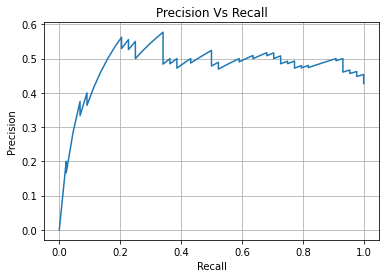

In [59]:
import matplotlib.pyplot as plt

plt.plot(recall_list, precision_list)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')
plt.grid()
plt.show()